In [1]:
import pandas as pd
import random
import nltk
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#Sample customer feedback data
feedback_data = {
    'reviewText': [
        "I absolutely love this product! It works great.",
        "Terrible service. I'm really unhappy.",
        "It's okay, but there’s room for improvement.",
        "Fantastic! Exceeded all my expectations.",
        "The quality is poor, and I'm very disappointed.",
        "Satisfactory experience, but encountered some issues.",
        "Great value for money. Highly recommend it!",
        "Will never buy this again. Very unhappy.",
        "Average product, nothing special about it.",
        "Excellent customer support. Very helpful!"
    ],
    'overall': [5, 1, 3, 5, 1, 3, 4, 1, 3, 5]  # Ratings from 1 (bad) to 5 (excellent)
}

# Creating a DataFrame
df = pd.DataFrame(feedback_data)
print("Sample Customer Feedback:")
print(df)


Sample Customer Feedback:
                                          reviewText  overall
0    I absolutely love this product! It works great.        5
1              Terrible service. I'm really unhappy.        1
2       It's okay, but there’s room for improvement.        3
3           Fantastic! Exceeded all my expectations.        5
4    The quality is poor, and I'm very disappointed.        1
5  Satisfactory experience, but encountered some ...        3
6        Great value for money. Highly recommend it!        4
7           Will never buy this again. Very unhappy.        1
8         Average product, nothing special about it.        3
9          Excellent customer support. Very helpful!        5


In [3]:
# Checking for missing values
print("\nMissing Values in Data:")
print(df.isnull().sum())

# Dropping any missing values if present
df.dropna(inplace=True)



Missing Values in Data:
reviewText    0
overall       0
dtype: int64


In [4]:
def preprocess_review(review):
    # Convert text to lowercase
    review = review.lower()
    # Remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the review
    tokens = word_tokenize(review)
    return tokens

# Applying the preprocessing function to the reviews
df['tokens'] = df['reviewText'].apply(preprocess_review)
print("\nPreprocessed Tokens:")
print(df[['reviewText', 'tokens']])



Preprocessed Tokens:
                                          reviewText  \
0    I absolutely love this product! It works great.   
1              Terrible service. I'm really unhappy.   
2       It's okay, but there’s room for improvement.   
3           Fantastic! Exceeded all my expectations.   
4    The quality is poor, and I'm very disappointed.   
5  Satisfactory experience, but encountered some ...   
6        Great value for money. Highly recommend it!   
7           Will never buy this again. Very unhappy.   
8         Average product, nothing special about it.   
9          Excellent customer support. Very helpful!   

                                              tokens  
0  [i, absolutely, love, this, product, it, works...  
1           [terrible, service, im, really, unhappy]  
2  [its, okay, but, there, ’, s, room, for, impro...  
3       [fantastic, exceeded, all, my, expectations]  
4  [the, quality, is, poor, and, im, very, disapp...  
5  [satisfactory, experience, b

In [5]:
def analyze_sentiment(review):
    # Using TextBlob to analyze sentiment
    analysis = TextBlob(review)
    return analysis.sentiment.polarity  # Returns a score between -1 (negative) and 1 (positive)

# Applying the sentiment analysis function
df['sentiment'] = df['reviewText'].apply(analyze_sentiment)
print("\nSentiment Scores:")
print(df[['reviewText', 'sentiment']])



Sentiment Scores:
                                          reviewText  sentiment
0    I absolutely love this product! It works great.   0.712500
1              Terrible service. I'm really unhappy.  -0.800000
2       It's okay, but there’s room for improvement.   0.500000
3           Fantastic! Exceeded all my expectations.   0.500000
4    The quality is poor, and I'm very disappointed.  -0.687500
5  Satisfactory experience, but encountered some ...   0.000000
6        Great value for money. Highly recommend it!   0.500000
7           Will never buy this again. Very unhappy.  -0.780000
8         Average product, nothing special about it.   0.103571
9          Excellent customer support. Very helpful!   0.625000


In [6]:
# Defining keywords that indicate issues
issue_keywords = ['poor', 'terrible', 'disappointed', 'issues', 'never buy again']

def find_issues(tokens):
    # Finding keywords related to issues
    return [word for word in tokens if word in issue_keywords]

# Applying the function to identify issues in the tokens
df['issues'] = df['tokens'].apply(find_issues)

# Counting all identified issues
all_issues = sum(df['issues'], [])
issue_counts = Counter(all_issues)

print("\nCommon Issues Identified:")
print(issue_counts)



Common Issues Identified:
Counter({'terrible': 1, 'poor': 1, 'disappointed': 1, 'issues': 1})


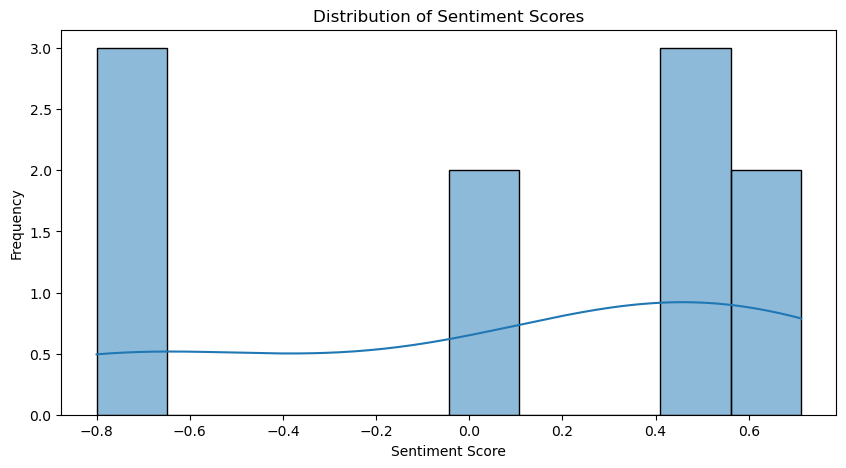

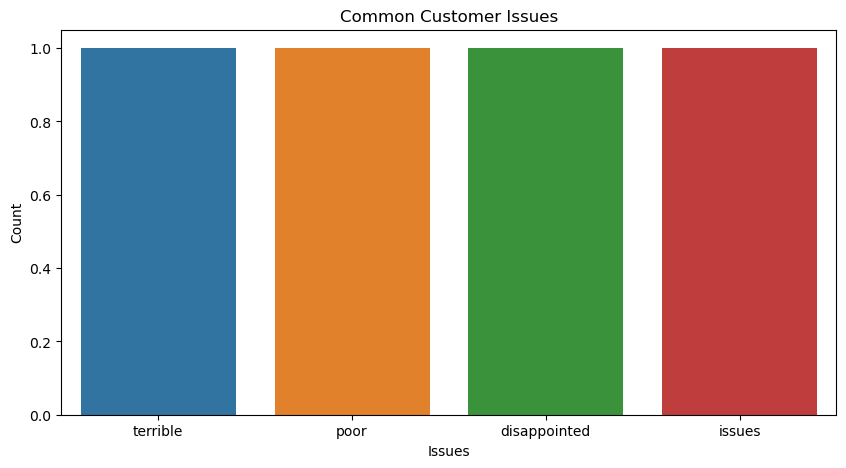

In [7]:
# Plotting the sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=10, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Visualizing common issues
issue_labels = list(issue_counts.keys())
issue_values = list(issue_counts.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=issue_labels, y=issue_values)
plt.title('Common Customer Issues')
plt.xlabel('Issues')
plt.ylabel('Count')
plt.show()
